# Main
## Funcionalidade
Esse notebook pode ser rodado diretamente num `Codespace` aqui no `Github`.

Rodar esse notebook para:
1. produzir o ajuste de parâmetros,
2. guardar os dados produzidos em arquivos para distribuição e reprodutibilidade,
3. produzir os gráficos.
4. para divulgação da pesquisa.

## ToDo
(05/03/2023) Problema: Os gráficos produzidos após o ajuste não coincidem com os gráficos produzidos após guardar e recuperar os dados. Receio que o problema esta na forma como produz os gráficos.
Já foi verificado que os dados produzidos e os que são guardados/recuperados são identicos. 
- [ ] Criar uma classe para passar os parâmetros da simulação.
- [ ] Criar uma função quie produz os gráficos.


In [1]:
# Carrega as librarias e funções
from loaddata import *
from fit_isol import *
from fitting import *
from validation import *
from save_all import *
from load_all import *
from gerar_figs_param import *
from omega_gamma import *
from simulations import *
from mostrar_dados import *
from mapa1 import *
import pandas as pd

In [ ]:
# Mostra todos os dados disponíveis
#mostrar_dados()

In [2]:
# Carrega os dados para fitting e para validação
dados_para_fit, dados_para_val = loaddata()

Carregando data...
Data loaded...OK!


Ajuste do polinômio de ordem 1 para os dados de isolamento.


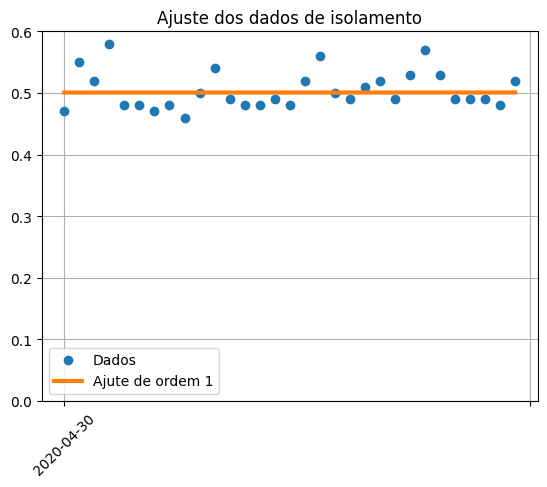


Dados após ajuste do índice de isolamento:

{'theta(t)': Polynomial([5.00645161e-01, 2.58064516e-04], domain=[ 0., 30.], window=[0.35, 0.59], symbol='x'),
 'theta0': 0.5006451612903227,
 'theta1': 0.0002580645161290346,
 'Residuos': array([0.02860258]),
 'rank': 2,
 'sing_values': array([1.36341391, 0.37563613]),
 'rcond': 6.8833827526759706e-15}

Ajuste do índice de isolamento finalizado... OK!


In [3]:
# Ajuste do índice de isolamento
dados_fit_isol = fit_isol(dados_para_fit, order=1, salvar_figs=False)


Iniciando ajuste de parâmetros
------------------------------

Rodando otimização...


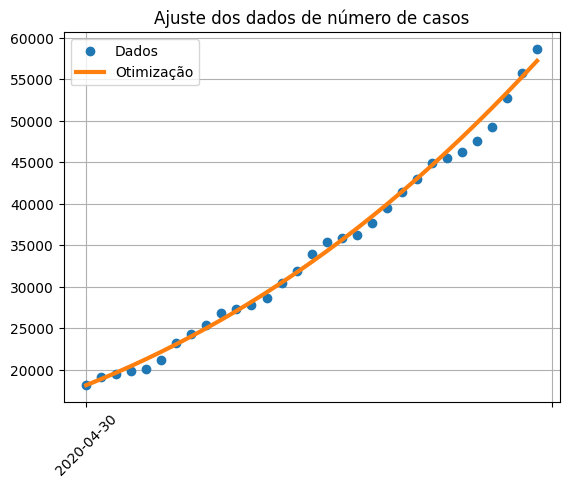


Dados após ajuste:

{'mu': 3.595e-05,
 'gamma': 0.0193498485435704,
 'alpha': 0.7244294650908844,
 'beta1': 0.15809502891545046,
 'beta2': 0.16129458955622256,
 'beta3': 0.1214944115732683,
 'i0': 0.0015291640082891642,
 's0': 0.9969418115714662,
 'sick0': 0.0015290244202445563,
 'N': 31,
 'pvoc': array([[ 8.21542126e+05,  3.70456533e+07,  3.89058775e+06,
         1.45172318e+07, -1.68516953e+05, -1.39228806e+05],
       [ 3.70456533e+07,  1.67058301e+09,  1.75436429e+08,
         6.54668813e+08, -7.59344141e+06, -6.27860283e+06],
       [ 3.89058775e+06,  1.75436429e+08,  1.84247732e+07,
         6.87488042e+07, -7.98157815e+05, -6.59342648e+05],
       [ 1.45172318e+07,  6.54668813e+08,  6.87488042e+07,
         2.56553208e+08, -2.97498873e+06, -2.46046708e+06],
       [-1.68516953e+05, -7.59344141e+06, -7.98157815e+05,
        -2.97498873e+06,  3.49294319e+04,  2.85356412e+04],
       [-1.39228806e+05, -6.27860283e+06, -6.59342648e+05,
        -2.46046708e+06,  2.85356412e+04,  2.3

In [4]:
# Ajuste de parâmetros para os sicks
dados_fit_din = fitting(dados_fit_isol, dados_para_fit, salvar_figs=False)

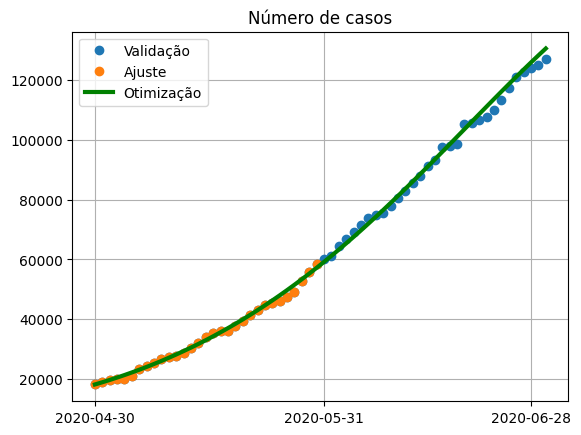

In [5]:
# Validação do fitting anterior
validation(dados_fit_isol, dados_fit_din, dados_para_fit, dados_para_val, salvar_figs=False)

In [6]:
# Salvar dados em arquivo csv com a data no nome.
filename_iso, filename_din = save_all(dados_fit_isol, dados_fit_din, apresentar=False, verificar=False)


Guardando todos os dados...

Dados do ajuste do indice de isolamento guardados no arquivo:
dados_iso-2023-03-04-14-01-23.csv .csv

Dados do ajuste dos dos parâmetros do sistema guardados no arquivo:
dados_din-2023-03-04-14-01-23.csv .csv


In [7]:
# Carregando dados salvos
#csv1 = 'dados_iso-2023-03-04-12-49-26.csv'
#csv2 = 'dados_din-2023-03-04-12-49-26.csv'
# pega sempre os últimos gerados
csv1 = filename_iso
csv2 = filename_din
dados_fit_isol_saved, dados_fit_din_saved = load_all(csv1, csv2)


Carregando dados do arquivo: dados_iso-2023-03-04-14-01-23.csv

Carregando dados do arquivo: dados_din-2023-03-04-14-01-23.csv

Dados carregados com sucesso...OK!



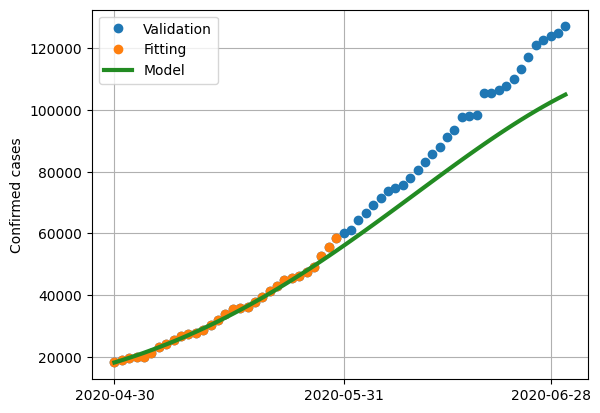

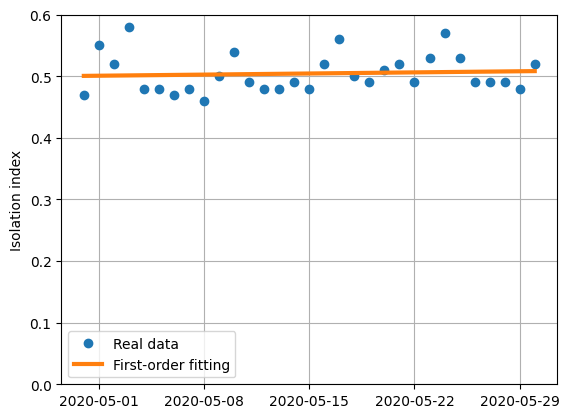

In [8]:
# Gerar figuras
gerar_figs_param(dados_para_fit, dados_para_val, dados_fit_isol_saved, dados_fit_din_saved, salvar_figs=False)

In [ ]:
# Simulações
#simulations(params_df, salvar_figs=False)
#mapa1(params_df)